In [435]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [436]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/anterior/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/anterior/TRAIN_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [437]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,CONTRADICTION
1,0.114918,100.71223,0.000,1.711384,0.369471,0.114918,0,1,0.114918,CONTRADICTION
2,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,1,1.000000,ENTAILMENT
3,1.064229,380.85742,2.171,18.322292,4.431219,0.195273,0,0,0.177042,CONTRADICTION
4,2.867368,241.05775,2.355,20.902023,4.989589,0.332594,1,2,0.471261,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...
34,0.924950,391.77950,1.685,18.350202,4.146894,0.135612,0,0,0.177094,CONTRADICTION
35,2.549616,343.11250,2.350,29.332251,5.025132,0.363223,0,0,0.407879,CONTRADICTION
36,3.173033,369.60180,2.088,34.950960,6.838347,0.257784,1,1,0.398060,CONTRADICTION
37,1.804459,204.06305,2.156,14.874765,3.171687,0.401213,0,0,0.369778,CONTRADICTION


In [438]:
train["relaciones"]=train["relaciones"]+train["antonimos"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

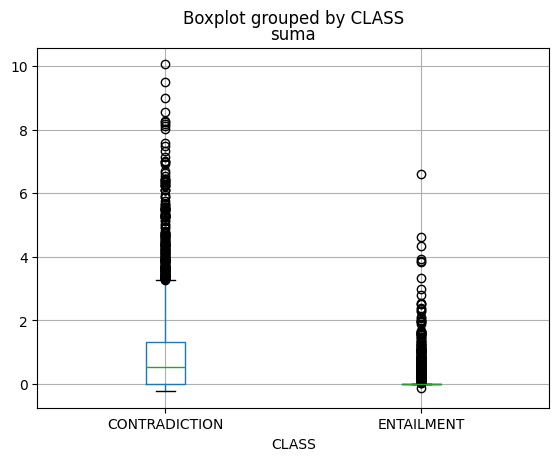

In [439]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

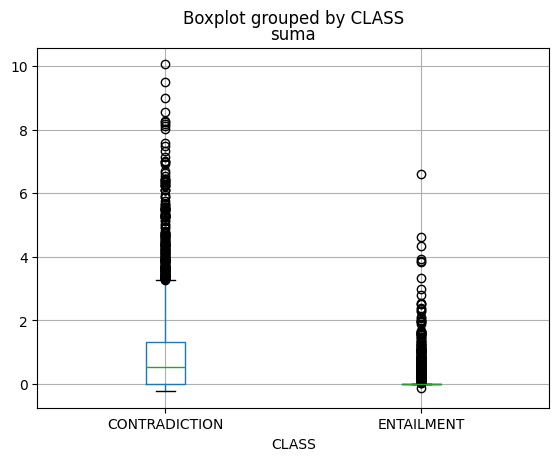

In [440]:
train.boxplot(by="CLASS",column=["suma"])

In [441]:
train=train.drop(["suma","distancias","entropias","antonimos"],axis=1)
train

,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000,0.000000,0.000000,1,1.000000,CONTRADICTION
1,1.711384,0.369471,0.114918,1,0.114918,CONTRADICTION
2,0.000000,0.000000,0.000000,1,1.000000,ENTAILMENT
3,18.322292,4.431219,0.195273,0,0.177042,CONTRADICTION
4,20.902023,4.989589,0.332594,3,0.471261,CONTRADICTION
...,...,...,...,...,...,...
34,18.350202,4.146894,0.135612,0,0.177094,CONTRADICTION
35,29.332251,5.025132,0.363223,0,0.407879,CONTRADICTION
36,34.950960,6.838347,0.257784,2,0.398060,CONTRADICTION
37,14.874765,3.171687,0.401213,0,0.369778,CONTRADICTION


In [442]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [443]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [444]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

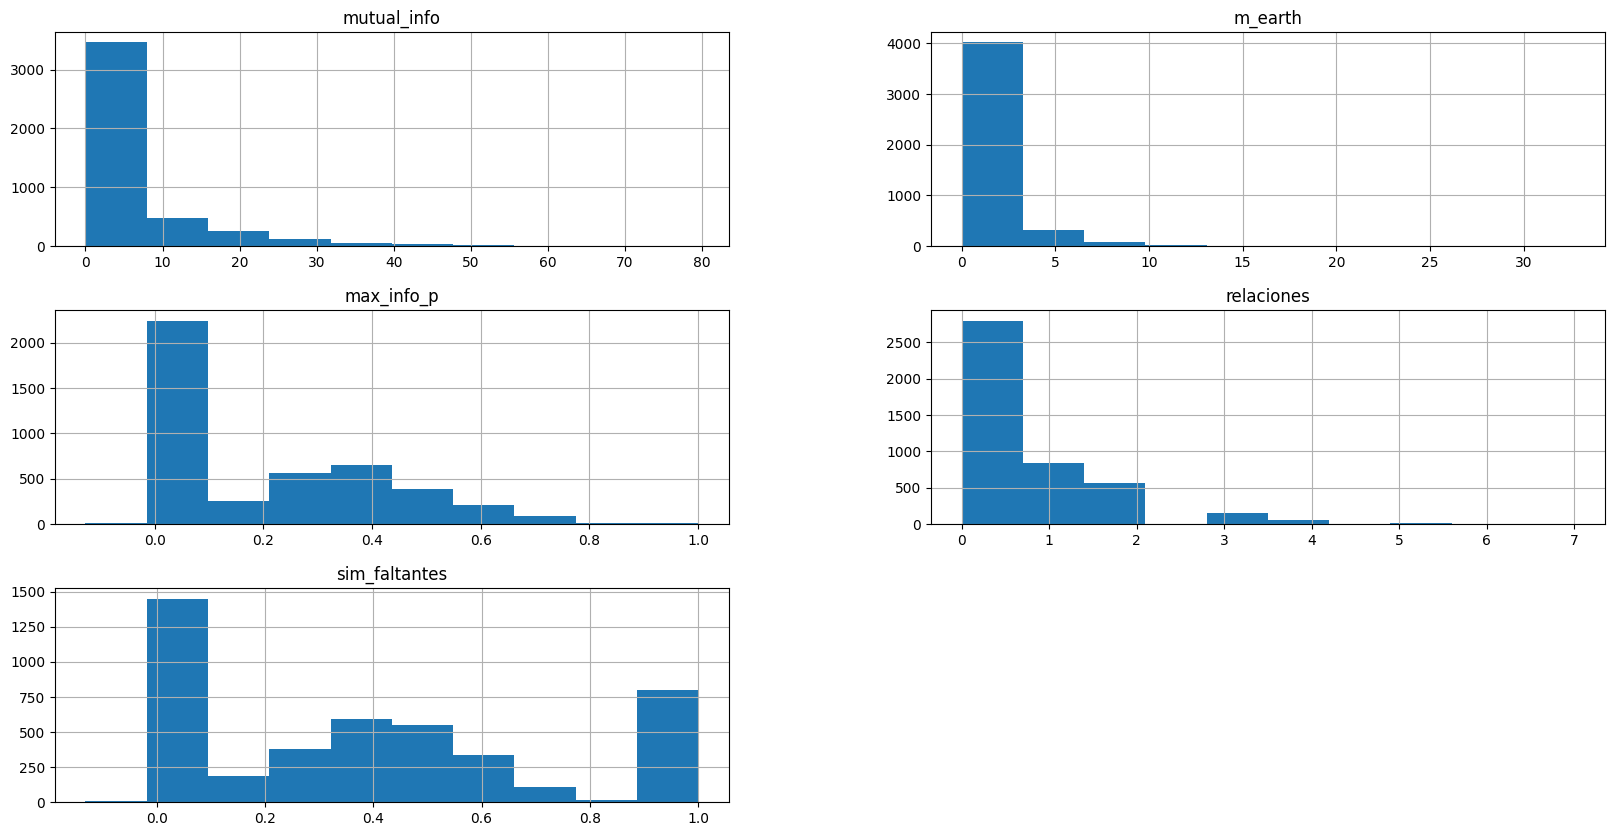

In [445]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [446]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/anterior/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/anterior/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [447]:
dev["relaciones"]=dev["relaciones"]+dev["antonimos"]

In [448]:
dev=dev.drop(["suma","entropias","distancias","antonimos"],axis=1)
dev

,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,6.906301,1.720222,0.278522,0,0.352328,CONTRADICTION
1,15.422091,2.632271,0.296344,2,0.458316,CONTRADICTION
2,1.897469,0.247676,0.378545,1,0.378546,CONTRADICTION
3,7.607406,1.297392,0.415203,2,0.538831,CONTRADICTION
4,0.000000,0.000000,0.000000,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...
90,10.616691,2.130698,0.199834,1,0.287339,CONTRADICTION
91,3.260589,0.495572,0.404658,0,0.260126,CONTRADICTION
92,21.247575,3.813996,0.197763,0,0.246701,CONTRADICTION
93,6.351086,1.874976,0.205298,2,0.162272,CONTRADICTION


In [449]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [450]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [451]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [452]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/anterior/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/anterior/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [453]:
test["relaciones"]=test["relaciones"]+test["antonimos"]

In [454]:
test=test.drop(["suma","entropias","antonimos","distancias"],axis=1)

test

,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,34.533986,7.224745,0.313013,1,0.428688,CONTRADICTION
1,28.020195,6.795347,0.368469,0,0.487296,CONTRADICTION
2,26.025844,5.007468,0.459162,1,0.580983,CONTRADICTION
3,0.000000,0.000000,0.000000,0,1.000000,ENTAILMENT
4,1.714587,0.262647,0.473630,0,0.473630,CONTRADICTION
...,...,...,...,...,...,...
1,22.072410,2.996832,0.368855,1,0.342264,CONTRADICTION
2,10.085201,3.234199,0.248313,1,0.210610,CONTRADICTION
3,5.211209,0.640615,0.178902,3,0.212080,CONTRADICTION
4,62.260364,12.531210,0.420467,2,0.568003,CONTRADICTION


In [455]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [456]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [457]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [458]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [459]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [460]:
model.decision_function(X)

array([-0.45276659, -1.03559988, -0.45276659, ..., -6.6445662 ,
       -3.05222552, -3.34298085])

In [461]:
labels=train.columns[:-1]
labels

Index(['mutual_info', 'm_earth', 'max_info_p', 'relaciones', 'sim_faltantes'], dtype='object')

In [462]:
model.classes_

array([0, 1])

In [463]:
model.coef_[0]

array([-0.61212941, -0.7290925 , -0.57080415, -0.6271756 ,  0.01386515])

In [464]:
coeficientes=model.coef_[0]

In [465]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 sim_faltantes 1 m_earth


In [466]:
n_columns=train.shape[1]-1

In [467]:
n_columns

5

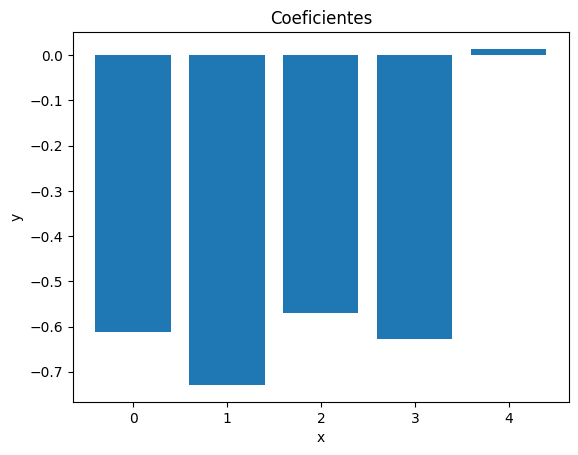

In [468]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [469]:
predictions = model.predict(X_dev)

In [470]:
print(confusion_matrix(y_dev, predictions))

[[279  73]
 [ 51  92]]


In [471]:
print(confusion_matrix(y_dev, predictions))

[[279  73]
 [ 51  92]]


In [472]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.56
recall 0.64
f1_score:  0.6


In [473]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.56
recall 0.64
f1_score:  0.6


In [474]:
predictions = model.predict(X_test)

In [475]:
print(confusion_matrix(y_test, predictions))

[[2749  753]
 [ 479  925]]


In [476]:
print(confusion_matrix(y_test, predictions))

[[2749  753]
 [ 479  925]]


In [477]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.66
f1_score:  0.6
matthews_score:  0.42


In [478]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.66
f1_score:  0.6
matthews_score:  0.42


In [479]:
X_train.shape

(4439, 5)

In [480]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [481]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [482]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.045538)


In [483]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.650000 (0.046384)


In [484]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.039078)


In [485]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.420000 (0.050680)


# SHAP

In [486]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [487]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [488]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

In [489]:
explainer.expected_value

-1.4394930341701948

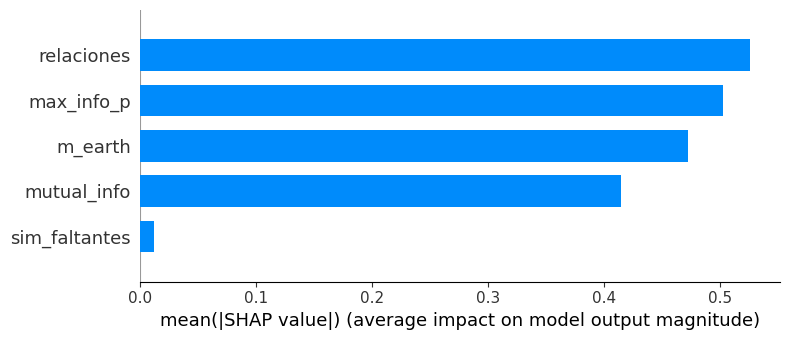

In [490]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1],plot_type="bar")